[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NaganoZemi/C_Team/blob/main/E201076/beta.ipynb)

In [1]:
import datetime
from pandas_datareader import data
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

# 別データが有る時

In [2]:
# 別データが有る場合
#期間設定
start = datetime.date(2017,1,1)
end = datetime.date(2023,1,21)

#銘柄
#7203toyota,9984sofbank,9983fastre,6758sony.6782panasonic
selected = ["^TPX"]

#株価データダウンロード
stooq = data.DataReader(selected,"stooq", start=start, end=end)
data1 = stooq["Close"]

data=pd.read_csv("./data.csv",index_col='Date', parse_dates=True)[["Close"]]
data1= pd.concat([data1,data],axis=1).sort_values(by='Date',ascending=True)

data2 = data1.pct_change()
data3 = data2.iloc[::-1]
data4 = data3.dropna()

x = data4[selected[0]].values.reshape(-1,1)
y = data4["Close"].values.reshape(-1,1)

model_lr = LinearRegression()
model_lr.fit(x,y)

print('β : %.3f' %model_lr.coef_)

β : 1.239


# 別データがない場合

In [124]:
# 別データがない場合
#期間設定
start = datetime.date(2017,1,1)
end = datetime.date(2023,1,21)

#銘柄
#7203toyota,9984sofbank,9983fastre,6758sony.6782panasonic
selected = ["^NKX","9983.JP"]

#株価データダウンロード
stooq = data.DataReader(selected,"stooq", start=start, end=end)
data1 = stooq["Close"]

data2 = data1.pct_change()
data3 = data2.iloc[::-1]
data4 = data3.dropna()

x = data4[selected[0]].values.reshape(-1,1)
y = data4[selected[1]].values.reshape(-1,1)

model_lr = LinearRegression()
model_lr.fit(x,y)

print('β : %.3f' %model_lr.coef_)

β : 1.124


# 作図

<function matplotlib.pyplot.show(close=None, block=None)>

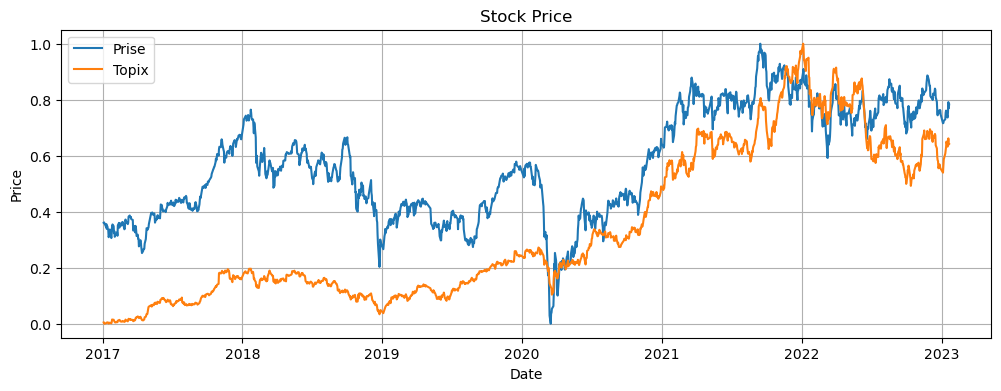

In [6]:
df1=stooq
df2=data

df3=(df2["Close"] - df2["Close"].values.min()) / (df2["Close"].values.max() - df2["Close"].values.min())
df4=(df1["Close"] - df1["Close"].values.min()) / (df1["Close"].values.max() - df1["Close"].values.min())

fig=plt.figure(figsize=(12,4))
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)

plt.plot(df4, label="Prise")
plt.plot(df3, label="Topix")

plt.legend()
plt.show